<a href="https://colab.research.google.com/github/V1PASH/PYTORCH/blob/main/01_Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib as plt

#Pytorch Workflow


https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
import torch

from torch import nn # nn contains all of pytorch building blocks for neural networks

import matplotlib as plt

import matplotlib.pyplot as plt

## 1. Data ( Preparing and loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* text

Machine learning is a game of two parts
1. Get data into numerical representation
2. Build a model to learn pattern in that numerical representation

to showcase this lets create some known data a linear regression formula.

we will use linear regression to create a straight line with known parameters.

In [ ]:
#create *known parameters

weight=0.7
bias=0.3

# create

start=0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)

y=weight * X+bias

X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

### Splititng data into training and test sets

Let's Create a training and test data

In [ ]:
#create a train test test split

train_split=int(0.8*len(X))

X_train , y_train =X[:train_split],y[:train_split]

X_test,y_test =X[train_split:] ,y[train_split:]

len(X_train) ,len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualise our data

"visualize,visualize,visualize"

In [ ]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  #plt training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #plot test data in green

  plt.scatter(test_data,test_labels,c="orange",s=4,label="Testing data")

  # are there any predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  #show legends
  plt.legend(prop={"size":14})

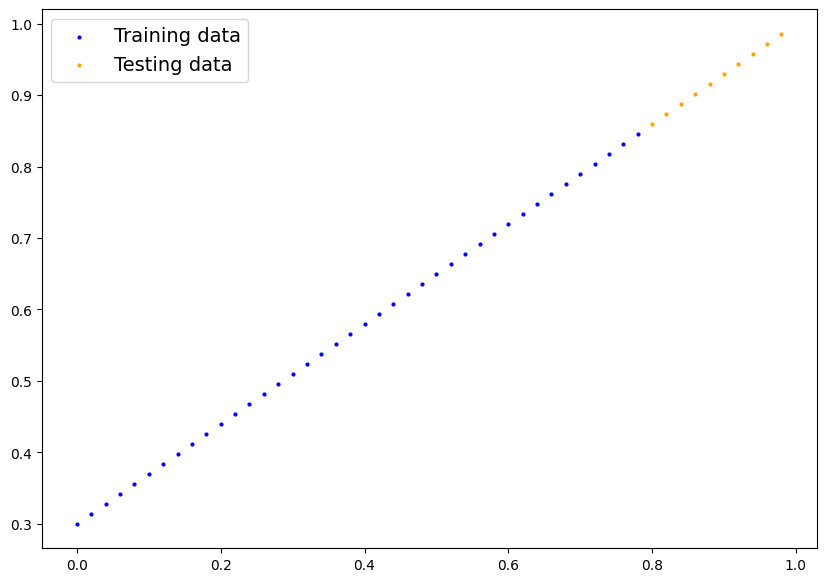

In [ ]:
plot_prediction()

## 2. building first pytorch model


we have to build class throughout need  OOPS


what the model does
* start with random values
* look at training data  and adjust the random value to better represent the ideal value

how does it do it
1. gradient desent
2. backpropagation


In [ ]:
# Create a linear regression
from torch import nn

class LinearRegression(nn.Module):#<-- Almost evyrthing on pytorch inharit nn module
 def __init__(self):
  super().__init__()

  self.weight=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)


  self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

 def forward(self,x:torch.Tensor)->torch.Tensor:# x is the input data
   return self.weight* x + self.bias


In [ ]:
torch.manual_seed(41)
torch.randn(1)

tensor([0.7906])

### Pytorch model building essentials
* torch.nn -- contains all of the building blocks for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter -- what parametre should our model try and learn , often a pytorch layer from torch.nn will set these for us
* torch.nn.Module -- The base class for all neural networks modules , if you subclass it, you should overwrite forward()

* torch.optim -- this where the optimizers in pytorch live ,they will help with gradient decent

* def forward( ) -- all nn module subclass require you   to override forward(), this method  defines what happens in forward computation


### Cheaking the content of our pytorch model

Now that we have craeted lets cheak whats inside..

So we can cheak our models parameter or whats inside our model using `.parameters()`


In [ ]:
# Creat a random seed

torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.model)

model_0 = LinearRegression()

model_0

list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List name parameters

model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using torch.inferane_mode()

To cheak our model prediction power ,lets see how it predict `y_test` based on `X_test`.

when we pass data through our model , its going to ru =n in through `forward()` method.

In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
Y_preds=model_0(X_test)
Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# make Prediction with model

with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

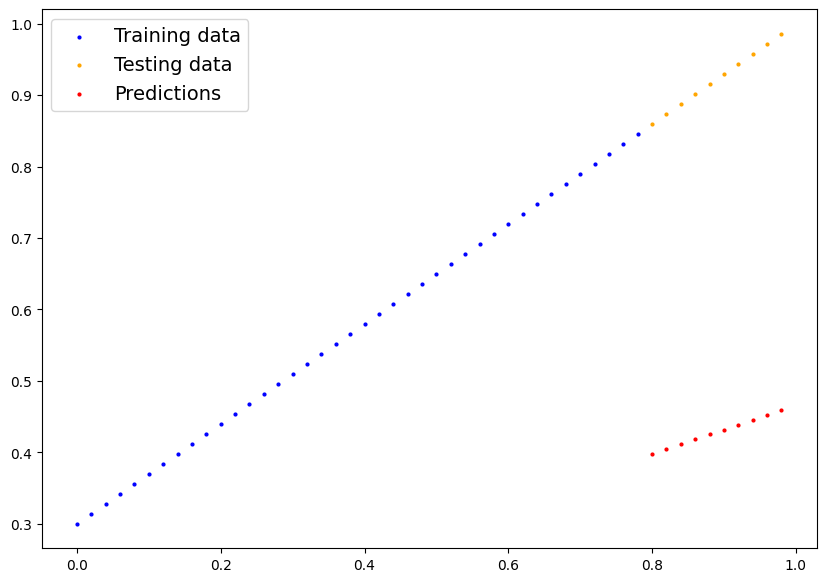

In [ ]:
plot_prediction(predictions=y_preds)

##3. Train model

the whole idea of training for a model to movre from some unknown parameters to some known parameter

from a poor to better representation of data

One way to measure the quality is to  use loss function

* Note : loss function may also be called cost function or criterion in diffrent area . for our case , we going to refer to it as loss function

Thing we need to train:

* **Loss Function :** A loss function is used to measure how wrong the model predictions are to test. the lower the better
* **Optimizer :** Takes into ccount the loss of a model and adjusts the models parameter to improve the loss function

and specifically ,for pytoch we need:

* training loop
* testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# cheak out models parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#setup a loss function

loss_fn =nn.L1Loss()

# setup an  optimizer (SGD gradient decent)

optimizer = torch.optim.SGD(params=model_0.parameters(),# params are the parametres you wnat to optimize
                            lr=0.01)# lr learning rate = most importnt hyper parameter you can set /// higer the lr higher the change


### Building a training loop(and a testig loop) in pytorch

A couple of things we need in a training loop :
0. Loop through the data
1. forward pass ( this envolve data moving through `forward()` function and to make predictions in data )
2. calculate the loss (compare forward pas predictions to ground truth table)
3. optimizer zero grad
4. loss backwards - move backwards through the network to calculate the graient of each of the parametrs of model with respect to the loss (**backpropogation**)
5. optimizer step - to try and improve the loss(**gradient decent**)

In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
torch.manual_seed(42)

# an epoch is one loop through the data
epochs =200

epoch_count =[]
loss_values=[]
test_loss_values=[]

## training
# 0 loop through the data

for epoch in range(epochs):

  # set the model training mode
  model_0.train()# train mode pytorch sets all parameters that require gradient to require gradients

  # 1. forward pass
  y_pred= model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn (y_pred,y_train)

  # print(f" loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propogation on the loss with respect to the parameters
  loss.backward()

  # 5. step the optimizer
  optimizer.step()# by deault how the optimier will accumulate through the loop .. we have to zero them abpover in step 3 in the loop

  ### Testing
  model_0.eval() # turns off diffrent setting in amodel not needed for evaluation

  with torch.inference_mode():# turns off gradient tracking & couple of more thing behinf the scene
    # 1. do the forward pass
    test_pred=model_0(X_test)

    # 2. calculate the test loss
    test_loss =loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

   # print(f"epoch:{epoch} || loss:{loss} ||  testloss: {test_loss}")

  #print out model state dict
 # print(model_0.state_dict())

with torch.inference_mode():
  y_preds_new=model_0(X_test)


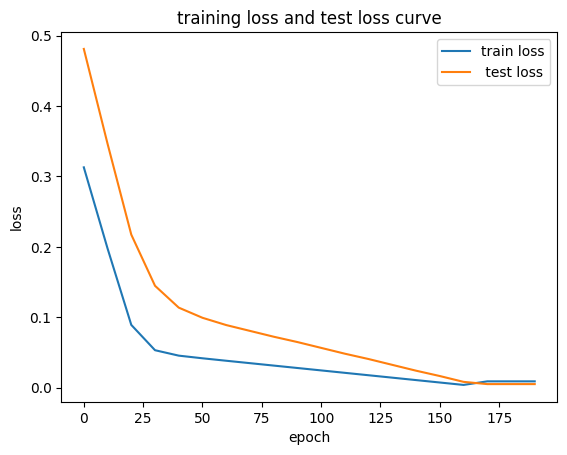

In [ ]:
import numpy as np
# convert tensor to numpy values

# plot the loss curves

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label=" test loss")
plt.title("training loss and test loss curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)


In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight,bias

(0.7, 0.3)

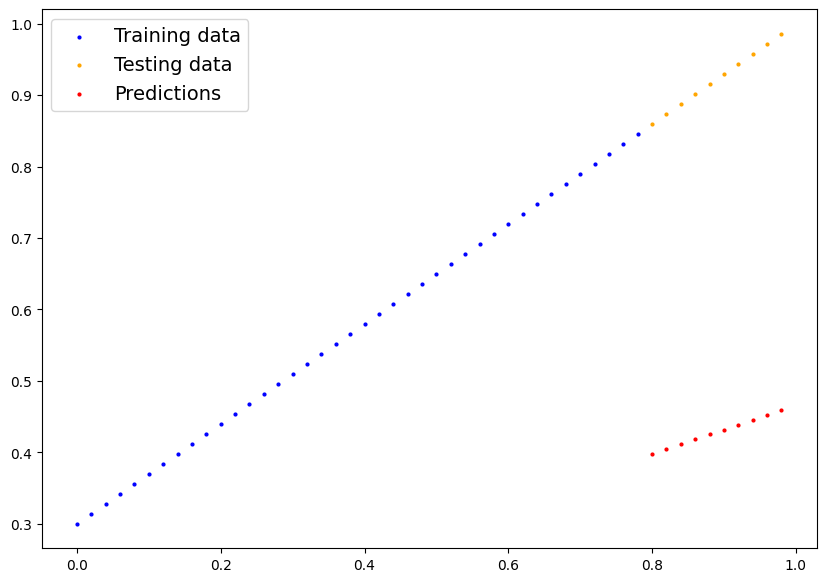

In [ ]:
plot_prediction(predictions=y_preds)

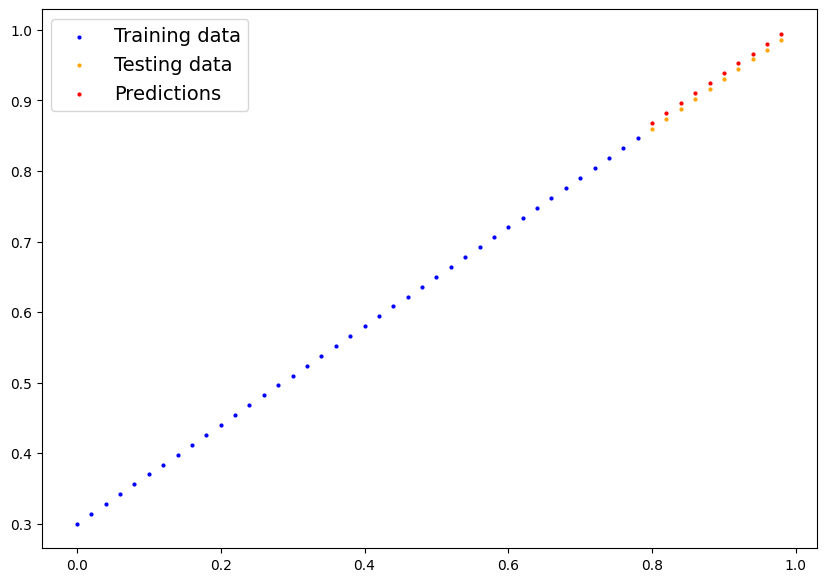

In [ ]:
plot_prediction(predictions=y_preds_new)

In [ ]:
model_0.state_dict(),weight ,bias

(OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 0.7,
 0.3)

## Saving model in pytorch

ther are 3 main method you should know about for saving and loading your models

1. `torch.save()` --  allow you to save a pytorch object in pythons pickle format
2. `torch.load()`-- allow you load a saved pytorch object
3. `torch.nn.module.load_state_dict()` -- this allows to load models saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our pytorch model
from pathlib import Path

# 1. create model directory

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. create amodel save path

MODEL_NAME= "My_First_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. save model state dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH


PosixPath('models/My_First_Model.pth')

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1538 Oct  5 17:19 My_First_Model.pth


## Loading a model

Since we Saved ourr model `state_dict()` rather then entire model we will create a new instance of model and load saved `tate_dict()`into that

In [ ]:
# to load in a saved state dict we have to instance a new instance of our model
loaded_model_0=LinearRegression()

# load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-261-571de175e73d>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# preds for loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_pred=model_0(X_test)

y_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_pred==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### putting it alltogether

Lets go back through the steps above and see it all in one place

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Create a Device Agnostic code


if available use gpu else cpu

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

#### 6.1 DATA

In [ ]:
# liner reggression formula Y=weight *x +bias

weight=0.578
bias=0.23

start=0
end=1
step=0.015

X=torch.arange(start,end,step).unsqueeze(dim=1)

y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0150],
         [0.0300],
         [0.0450],
         [0.0600],
         [0.0750],
         [0.0900],
         [0.1050],
         [0.1200],
         [0.1350]]),
 tensor([[0.2300],
         [0.2387],
         [0.2473],
         [0.2560],
         [0.2647],
         [0.2734],
         [0.2820],
         [0.2907],
         [0.2994],
         [0.3080]]))

In [ ]:
# split data
train_split=int(0.8*len(X))

X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(53, 53, 14, 14)

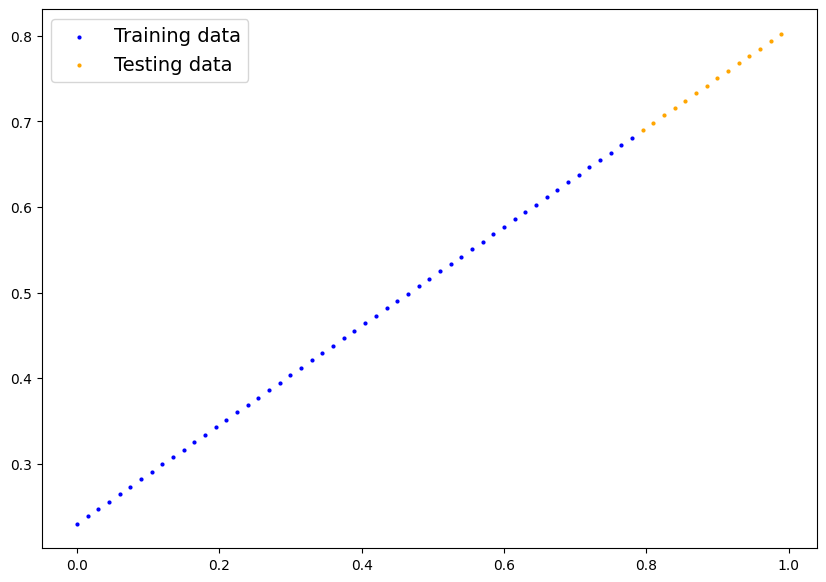

In [ ]:
#plot the data

plot_prediction(train_data= X_train,train_labels= y_train,test_data= X_test,test_labels= y_test)

#### 6.2 lets create a model

In [ ]:
class LinerRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating model parameter / also called :linear transform
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(4)

model_1=LinerRegressionModelV2()

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1193]])),
             ('linear_layer.bias', tensor([0.1182]))])

In [ ]:
with torch.inference_mode():
 y_predictions=model_1(X_test)

In [ ]:
y_predictions

tensor([[0.2130],
        [0.2148],
        [0.2166],
        [0.2184],
        [0.2202],
        [0.2220],
        [0.2237],
        [0.2255],
        [0.2273],
        [0.2291],
        [0.2309],
        [0.2327],
        [0.2345],
        [0.2363]])

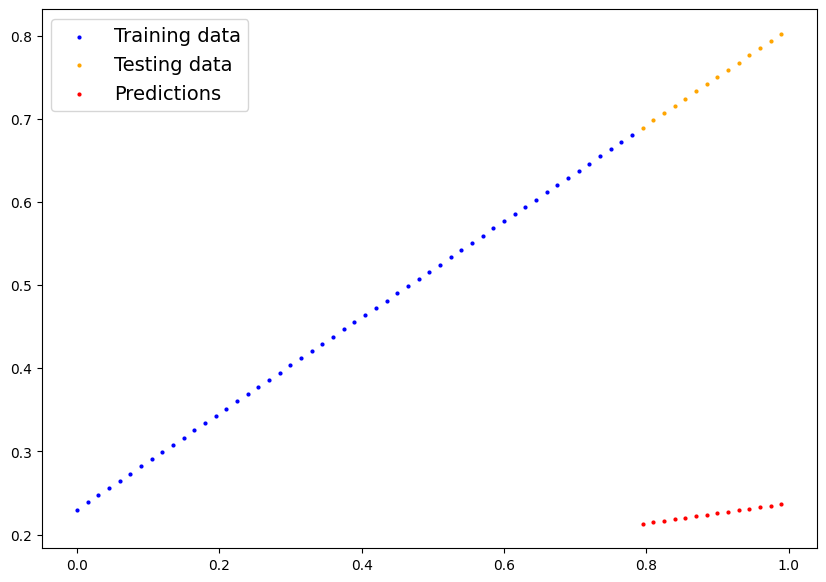

In [ ]:
#plot the data

plot_prediction(train_data= X_train,train_labels= y_train,test_data= X_test,test_labels= y_test,predictions=y_predictions)

In [ ]:
# set model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#### 6.3 Training

 we need
* loss function
* optimizer
* training loop
* testing loop

In [ ]:
# setup loss function
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [ ]:
torch.manual_seed(4)

epochs=2500
# put data on target device

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range( epochs):
  model_1.train()

  y_pred=model_1(X_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)
  #if epoch%10==0:
    #print(f"loss : {loss}   :  test loss {test_loss}")


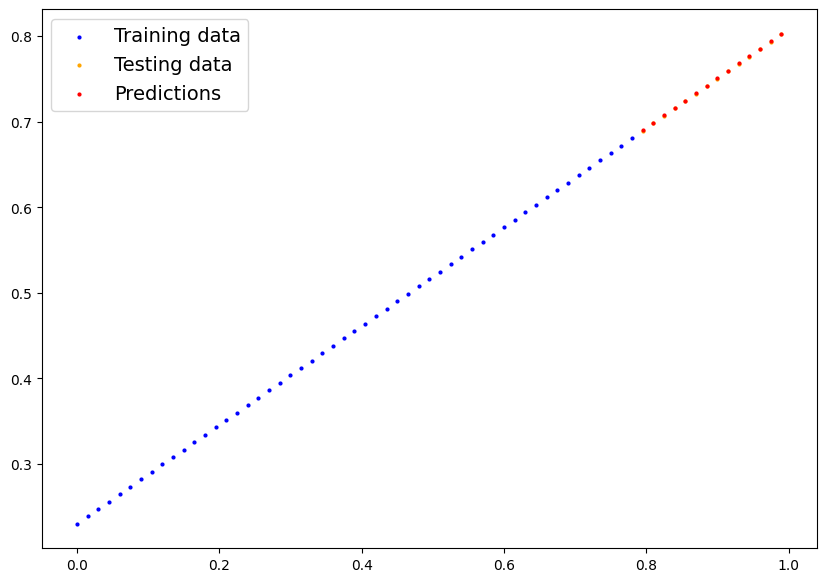

In [ ]:
with torch.inference_mode():
 y_predictions=model_1(X_test)

#plot the data

plot_prediction(train_data= X_train.to("cpu"),train_labels= y_train.to("cpu"),test_data= X_test.to("cpu"),test_labels= y_test.to("cpu"),predictions=y_predictions.to("cpu"))

#### 6.5 saving and loading a pytorch model

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5778]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2308], device='cuda:0'))])

In [ ]:
from pathlib import Path

model_path=Path("model_1")
model_path.mkdir(parents=True,exist_ok=True)

model_name="trained_second_model.pth"

model_save_path=model_path/model_name

torch.save(obj=model_1.state_dict(),f=model_save_path)

model_save_path

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5778]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2308], device='cuda:0'))])

In [ ]:
loaded_model_2=LinerRegressionModelV2()

loaded_model_2.load_state_dict(torch.load(model_save_path))

<ipython-input-296-c1604eac984b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(model_save_path))


<All keys matched successfully>

In [ ]:
loaded_model_2.to(device)

LinerRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_2.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model_2(X_test.to(device))

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_preds=model_1(X_test)

In [ ]:
y_predictions

tensor([[0.6902],
        [0.6988],
        [0.7075],
        [0.7162],
        [0.7248],
        [0.7335],
        [0.7422],
        [0.7509],
        [0.7595],
        [0.7682],
        [0.7769],
        [0.7855],
        [0.7942],
        [0.8029]], device='cuda:0')

In [ ]:
loaded_model_preds.to(device)

tensor([[0.6902],
        [0.6988],
        [0.7075],
        [0.7162],
        [0.7248],
        [0.7335],
        [0.7422],
        [0.7509],
        [0.7595],
        [0.7682],
        [0.7769],
        [0.7855],
        [0.7942],
        [0.8029]], device='cuda:0')

In [ ]:
loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5778]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2308], device='cuda:0'))])